In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf


In [14]:
# define time range 
start = '2000-01-01' # format: YYYY-MM-DD
end = dt.datetime.now() # today

In [24]:
# favorite stock symbol 
#stock='AMD'
stock='^NSEI'

#stock='^NSEBANK'

In [25]:
df = yf.download(stock,start, end, interval='1d')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


In [26]:
# Let's calulate Simple Moving Average(SMA)
short_sma= 20
long_sma = 50
SMAs=[short_sma, long_sma]

In [27]:
for i in SMAs:
    df["SMA_"+str(i)]= df.iloc[:,4].rolling(window=i).mean()

In [28]:
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50
Date,,,,,,,,
2022-07-06,15818.200195,16011.349609,15800.900391,15989.799805,15989.799805,288400,15742.022412,16139.901055
2022-07-07,16113.750000,16150.500000,16045.950195,16132.900391,16132.900391,264600,15724.762451,16121.791055
2022-07-08,16273.650391,16275.500000,16157.900391,16220.599609,16220.599609,0,15725.702441,16101.302031


In [29]:
position=0 # 1 means we have already entered poistion, 0 means not already entered
counter=0
percentChange=[]   # empty list to collect %changes 
for i in df.index:
    SMA_short=df['SMA_20']
    SMA_long =df['SMA_50']
    close=df['Adj Close'][i]
    
    if(SMA_short[i] > SMA_long[i]):
        print('Up trend')
        if(position==0):
            buyP=close   #buy price
            position=1   # turn position
            print("Buy at the price"+str(buyP))
        
    elif(SMA_short[i] < SMA_long[i]):
        print('Down trend')
        if(position==1):   # have a poistion in down trend
            position=0     # selling position
            sellP=close    # sell price
            print("Sell at the price"+str(sellP))
            perc=(sellP/buyP-1)*100
            percentChange.append(perc)
    if(counter==df["Adj Close"].count()-1 and position==1):
        position=0
        sellP=close
        print("Sell at the price"+str(sellP))
        perc=(sellP/buyP-1)*100
        percentChange.append(perc)

    counter+=1
print(percentChange)

Up trend
Buy at the price5698.14990234375
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Down trend
Sell at the price5274.10009765625
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down 

In [30]:

gains=0
numGains=0
losses=0
numLosses=0
totReturn=1
for i in percentChange:
    if(i>0):
        gains+=i
        numGains+=1
    else:
        losses+=i
        numLosses+=1
    totReturn = totReturn*((i/100)+1)
totReturn=round((totReturn-1)*100,2)
print("This statistics is from "+str(df.index[0])+" up to now with "+str(numGains+numLosses)+" trades:")
print("SMAs used: "+str(SMAs))
print("Total return over "+str(numGains+numLosses)+ " trades: "+ str(totReturn)+"%" )

This statistics is from 2007-09-17 00:00:00 up to now with 35 trades:
SMAs used: [20, 50]
Total return over 35 trades: 130.74%


In [31]:
if (numGains>0):
    avgGain=gains/numGains
    maxReturn= str(max(percentChange))
else:
    avgGain=0
    maxReturn='unknown'

if(numLosses>0):
    avgLoss=losses/numLosses
    maxLoss=str(min(percentChange))
    ratioRR=str(-avgGain/avgLoss)  # risk-reward ratio
else:
    avgLoss=0
    maxLoss='unknown'
    ratioRR='inf'
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxReturn)
print("Max Loss: "+ maxLoss)
print("Gain/loss ratio: "+ ratioRR)

Average Gain: 13.503418215040472
Average Loss: -6.237929136619014
Max Return: 66.41826991188053
Max Loss: -11.293318637075078
Gain/loss ratio: 2.1647277356471197


In [32]:
if(numGains>0 or numLosses>0):
    batAvg=numGains/(numGains+numLosses)
else:
    batAvg=0
print("Batting Avg: "+ str(batAvg))

Batting Avg: 0.4857142857142857


C:\Users\HP\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


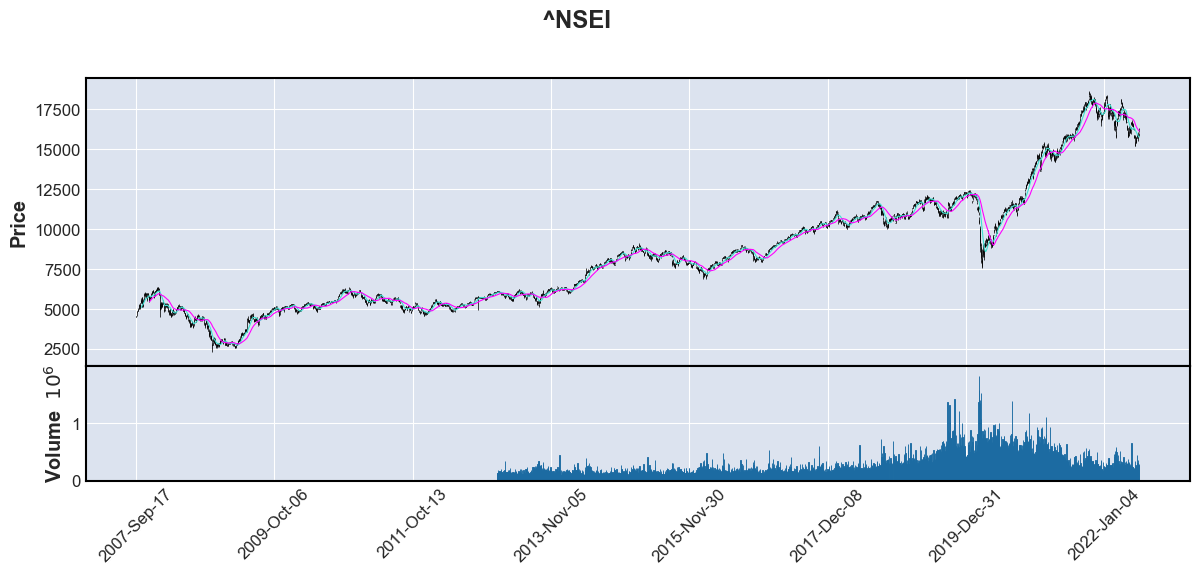

In [33]:
mpf.plot(df, type = 'ohlc',figratio=(16,6), mav=(short_sma,long_sma), 
         volume=True, title= str(stock), style='default')